In [20]:
# import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from pandas.plotting import scatter_matrix

## **Business Understanding**

Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.

## **Data Understanding**

In [21]:
# navigation do data folder
actual_folder = os.path.abspath(os.getcwd())
data_folder = os.path.dirname(os.path.dirname(actual_folder))

# reading data
df = pd.read_csv(f'{data_folder}/04. Data/01. drug200.csv', sep = ',')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [22]:
# columns and line for the dataset
columns = df.shape[1]
lines = df.shape[0]
print(f'-- Lines >>> {lines} \n-- Columns >>> {columns}\n')

print('-'*30)

columns_names = df.columns
print(f'\n-- Columns names >> {[column_name for column_name in columns_names]}')

-- Lines >>> 200 
-- Columns >>> 6

------------------------------

-- Columns names >> ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']


In [23]:
# data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [24]:
# information of numeric features
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [25]:
# information of categorical features
df.describe(include = 'O')

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,drugY
freq,104,77,103,91


In [26]:
# check values of medications/drugs
[print(drug) for drug in df['Drug'].unique()]

drugY
drugC
drugX
drugA
drugB


[None, None, None, None, None]

## **Data Preparation**

In [27]:
# split in X and y our dataset
X = df.drop(['Drug'], axis = 1) # features
y = df['Drug'] # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [28]:
# check the size of train and test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((134, 5), (66, 5), (134,), (66,))

In [29]:
# Transform categorical features with label encoding
encoder_X = ce.OrdinalEncoder(cols = ['Sex', 'BP', 'Cholesterol'])
X_train = encoder_X.fit_transform(X_train)
X_test = encoder_X.transform(X_test)

encoder_Y = ce.OrdinalEncoder(cols = ['Drug'])
y_train = encoder_Y.fit_transform(y_train)
y_test = encoder_Y.transform(y_test)

#### *Check the transform of values*

In [30]:
X_train.head()

,Age,Sex,BP,Cholesterol,Na_to_K
42,50,1,1,1,15.790
189,64,1,2,1,20.932
90,62,1,1,2,16.594
136,55,2,2,2,10.977
51,67,1,1,1,10.898


In [31]:
X_test.head()

,Age,Sex,BP,Cholesterol,Na_to_K
95,36,1,3,1,11.424
15,16,2,2,1,15.516
30,18,2,1,1,8.750
158,59,2,3,2,10.444
128,47,1,3,1,33.542


In [32]:
y_train.head()

,Drug
42,1
189,1
90,1
136,2
51,3


In [33]:
y_test.head()

,Drug
95,3
15,1
30,3
158,5
128,1


## **Modeling**

In [34]:
# creating the decision tree classifier, training and testing
clf_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 10)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)

In [35]:
# check the score of the model
print(f'Model acurracacy score: {round(accuracy_score(y_test, y_pred_gini), 4)}')

Model acurracacy score: 0.8485


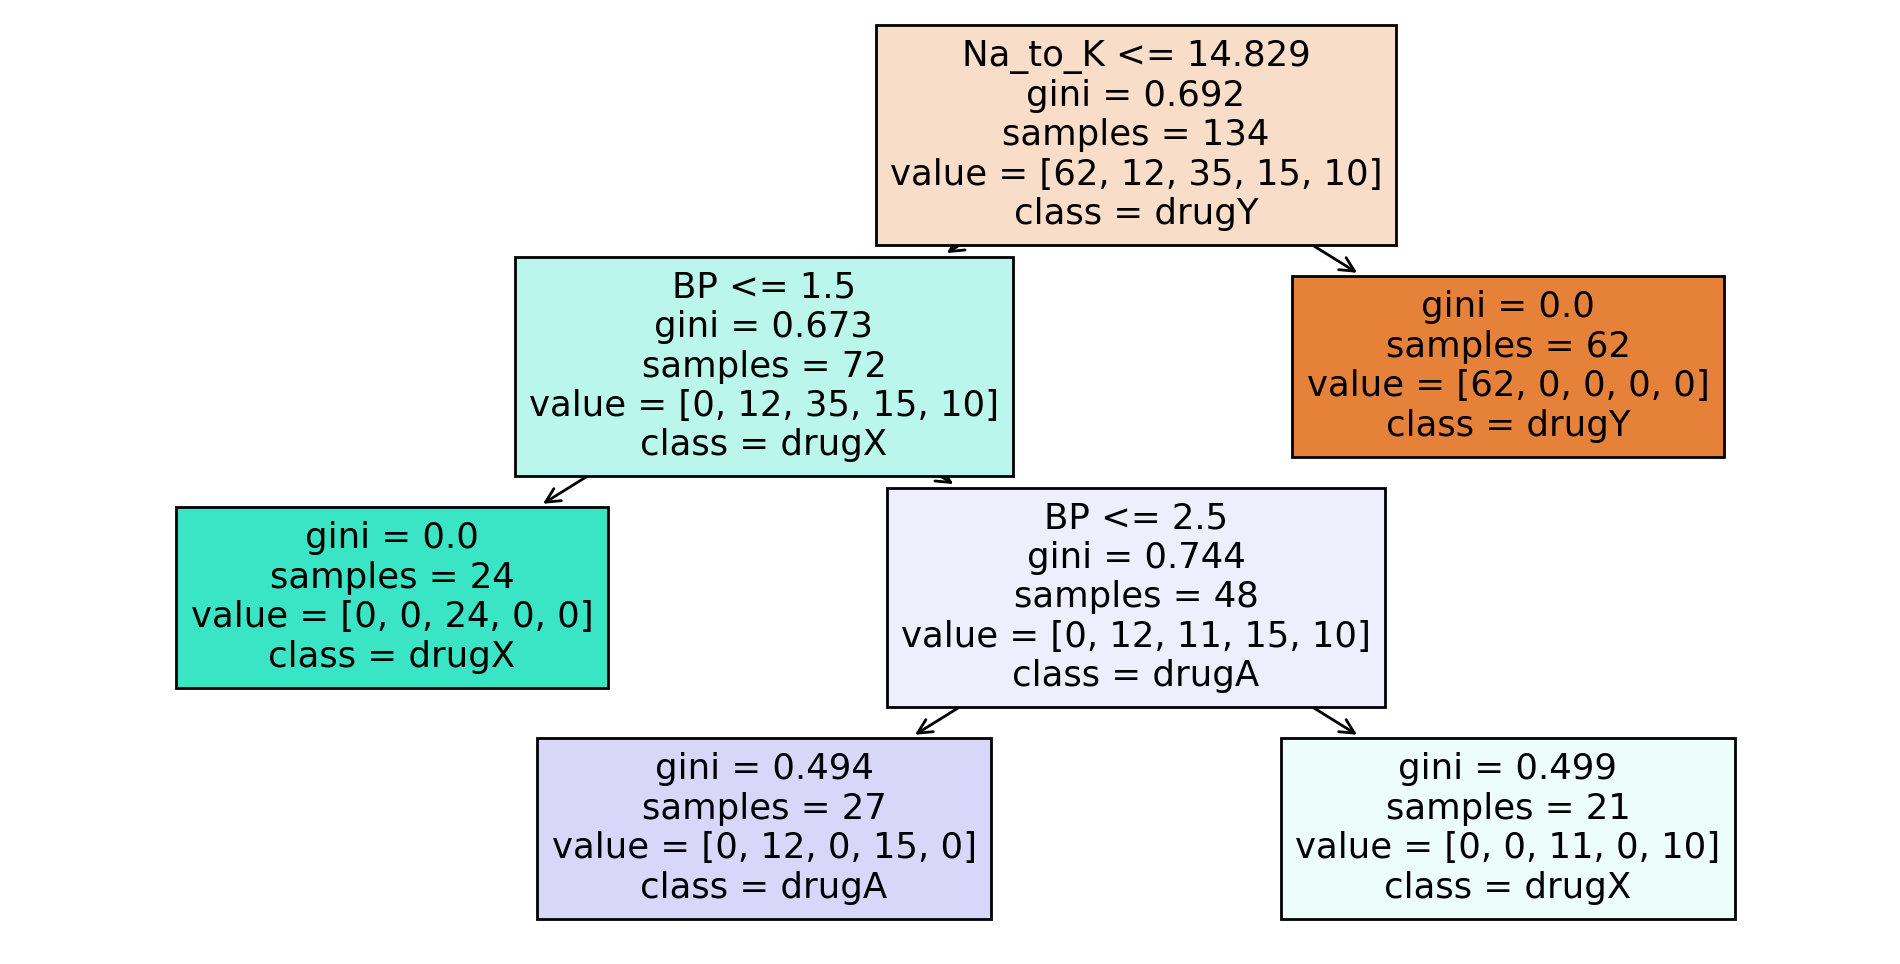

In [36]:
# visualising the Decision Tree:
plt.figure(figsize = (12,6), dpi = 200)
tree.plot_tree(clf_gini.fit(X_train, y_train), feature_names = df.columns, filled = True, class_names = df['Drug'].unique())
plt.show()